In [69]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerPatch
import xarray as xr
import numpy as np
import pandas as pd
import calendar
import seaborn as sns
import seaborn_image as isns

In [70]:
import plotly.io as pio
pio.renderers.default='jupyterlab'

In [71]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Times")
sns.set_context(font_scale=0.8)

In [72]:
dataset = (r'/Volumes/UnionSine/Cropped_DataTransfer/SWT&MLD/MLD_2.6/mld_baseline_2.6_weighted.nc')
data_baseline = xr.open_dataset(dataset)

In [73]:
dataset_oae = (r'/Volumes/UnionSine/Cropped_DataTransfer/SWT&MLD/MLD_2.6/mld_oae_2.6_weighted.nc')
data_oae = xr.open_dataset(dataset_oae)

### EU Seasonal Average of SST

In [75]:
sliced_frame_baseline = data_baseline.sel(time_counter=slice('2090', '2100'))

In [76]:
sliced_frame_oae = data_oae.sel(time_counter=slice('2090', '2100'))

In [77]:
data_baseline_plot = (data_baseline.mld).to_dataset(name='mld')
data_oae_plot = (data_oae.mld).to_dataset(name='mld')

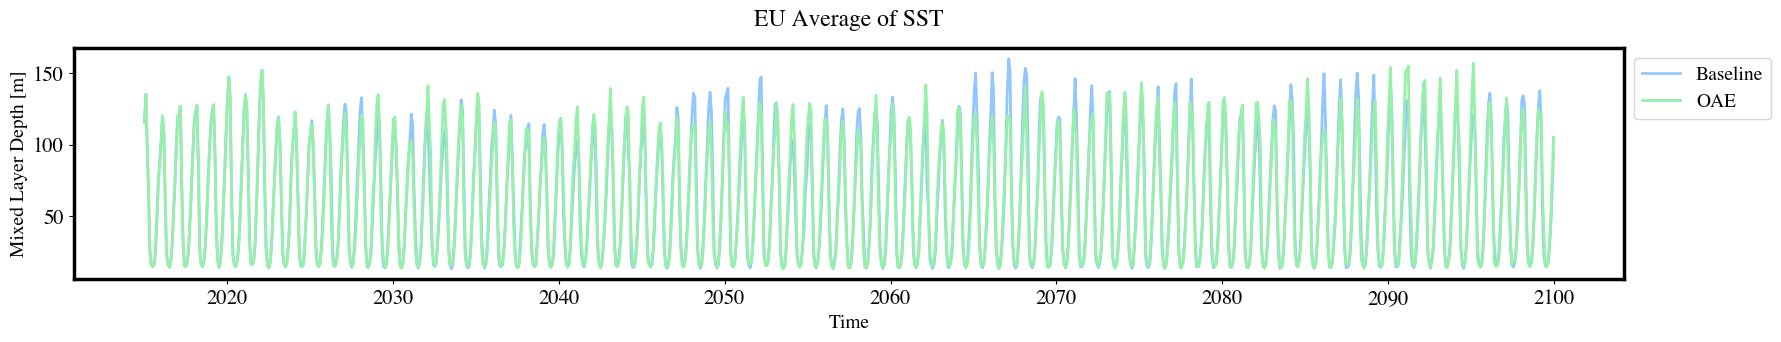

In [78]:
plt.figure(figsize=(20, 3))
plt.plot(data_baseline_plot.time_counter, data_baseline_plot.mld, linewidth=2, label = 'Baseline')
plt.plot(data_oae_plot.time_counter, data_oae_plot.mld, linewidth=2, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("Mixed Layer Depth [m]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('EU Average of SST', fontname="Times", fontsize=17, y=1.06)
plt.show()

In [79]:
sliced_frame_baseline_plot = (sliced_frame_baseline.mld).to_dataset(name='mld')
sliced_frame_oae_plot = (sliced_frame_oae.mld).to_dataset(name='mld')

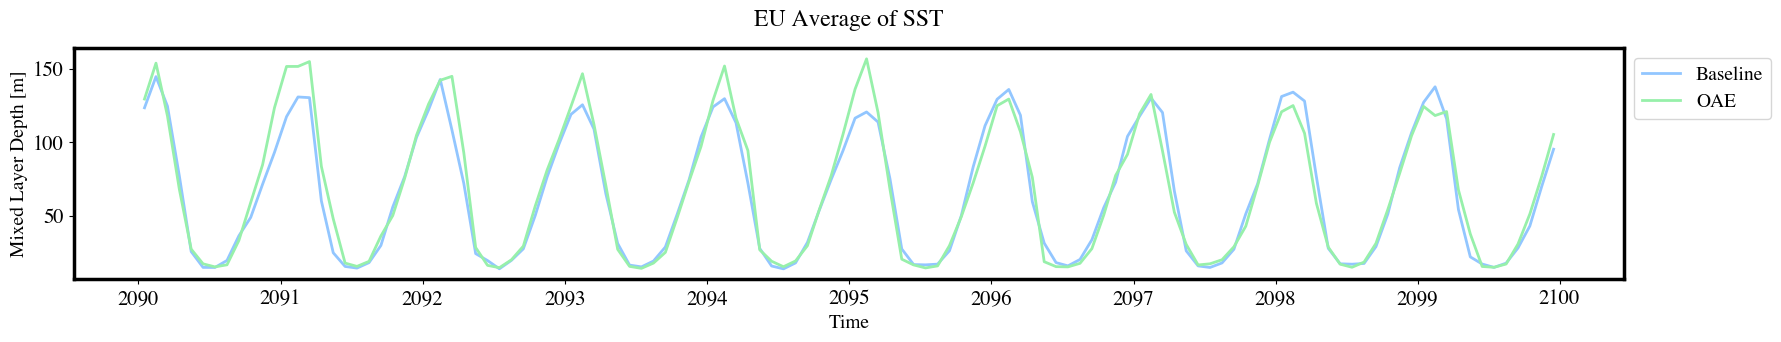

In [80]:
plt.figure(figsize=(20, 3))
plt.plot(sliced_frame_baseline_plot.time_counter, sliced_frame_baseline_plot.mld, linewidth=2, label = 'Baseline')
plt.plot(sliced_frame_oae_plot.time_counter, sliced_frame_oae_plot.mld, linewidth=2, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("Mixed Layer Depth [m]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('EU Average of SST', fontsize=17, y=1.06)
plt.show()

### Unweighted EU Seasonal Average of SST

In [81]:
# condition

start_date = "2090-01-01"
end_date = "2100-01-01"

In [82]:
mld_baseline = data_baseline["mld"].sel(time_counter=slice(start_date, end_date))

In [83]:
mld_seasonal_mean_baseline = (mld_baseline.resample(time_counter='QS-DEC').mean(keep_attrs=True))

In [84]:
mld_oae = data_oae["mld"].sel(time_counter=slice(start_date, end_date))

In [85]:
mld_seasonal_mean_oae = (mld_oae.resample(time_counter='QS-DEC').mean(keep_attrs=True))

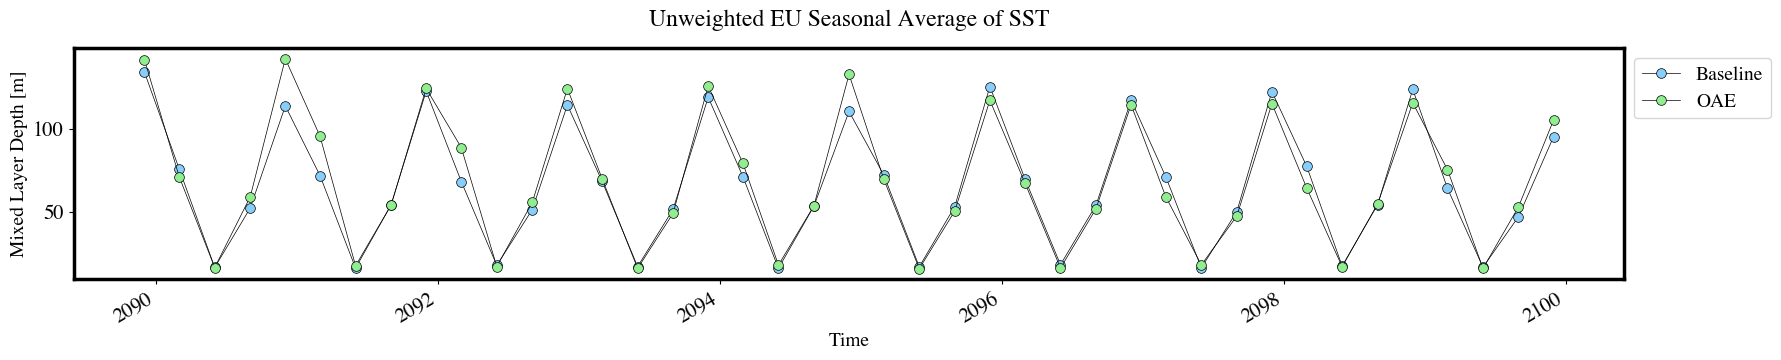

In [86]:
f, ax = plt.subplots(figsize=(20, 3))

mld_seasonal_mean_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

mld_seasonal_mean_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5, 
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Unweighted EU Seasonal Average of SST", fontsize= 17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("Mixed Layer Depth [m]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted EU Seasonal Average of SST

In [87]:
month_length_baseline = mld_baseline.time_counter.dt.days_in_month
mld_weighted_season_baseline = ((mld_baseline * month_length_baseline).resample(time_counter='QS-DEC').sum() / month_length_baseline.resample(time_counter='QS-DEC').sum())

In [88]:
month_length_oae = mld_oae.time_counter.dt.days_in_month
mld_weighted_season_oae = ((mld_oae * month_length_oae).resample(time_counter='QS-DEC').sum() / month_length_oae.resample(time_counter='QS-DEC').sum())

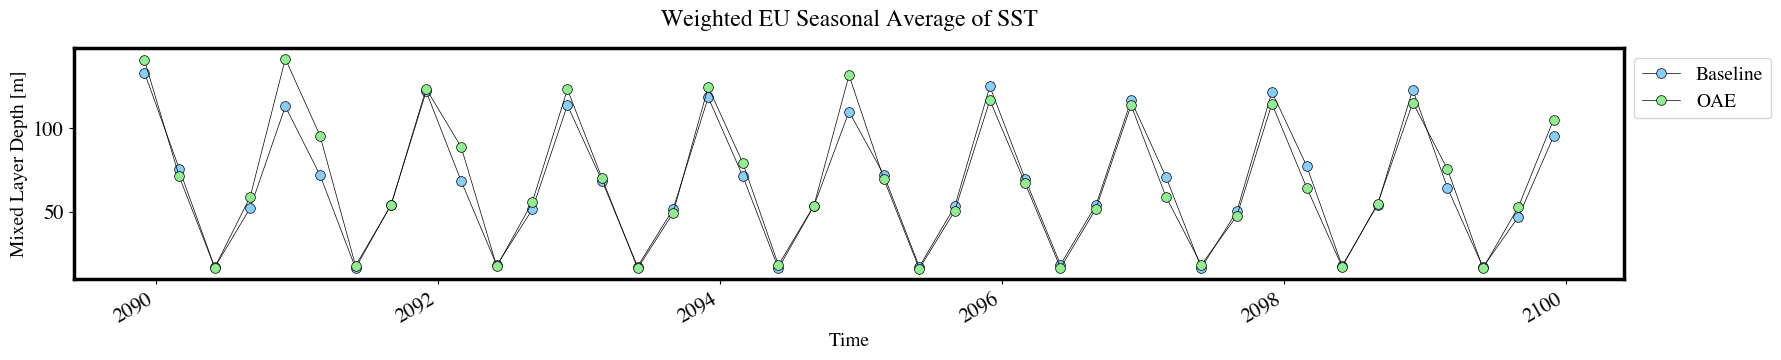

In [89]:
f, ax = plt.subplots(figsize=(20, 3))
mld_weighted_season_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5, 
                        markerfacecolor="lightskyblue",
                        markeredgecolor="black", 
                        label = 'Baseline')

mld_weighted_season_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5, 
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Weighted EU Seasonal Average of SST", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("Mixed Layer Depth [m]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted EU Seasonal Average of SST (seasons displayed)

In [90]:
# condition

colors = {3: "lightgreen", 6: "orange", 9: "brown", 12: "lightblue"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

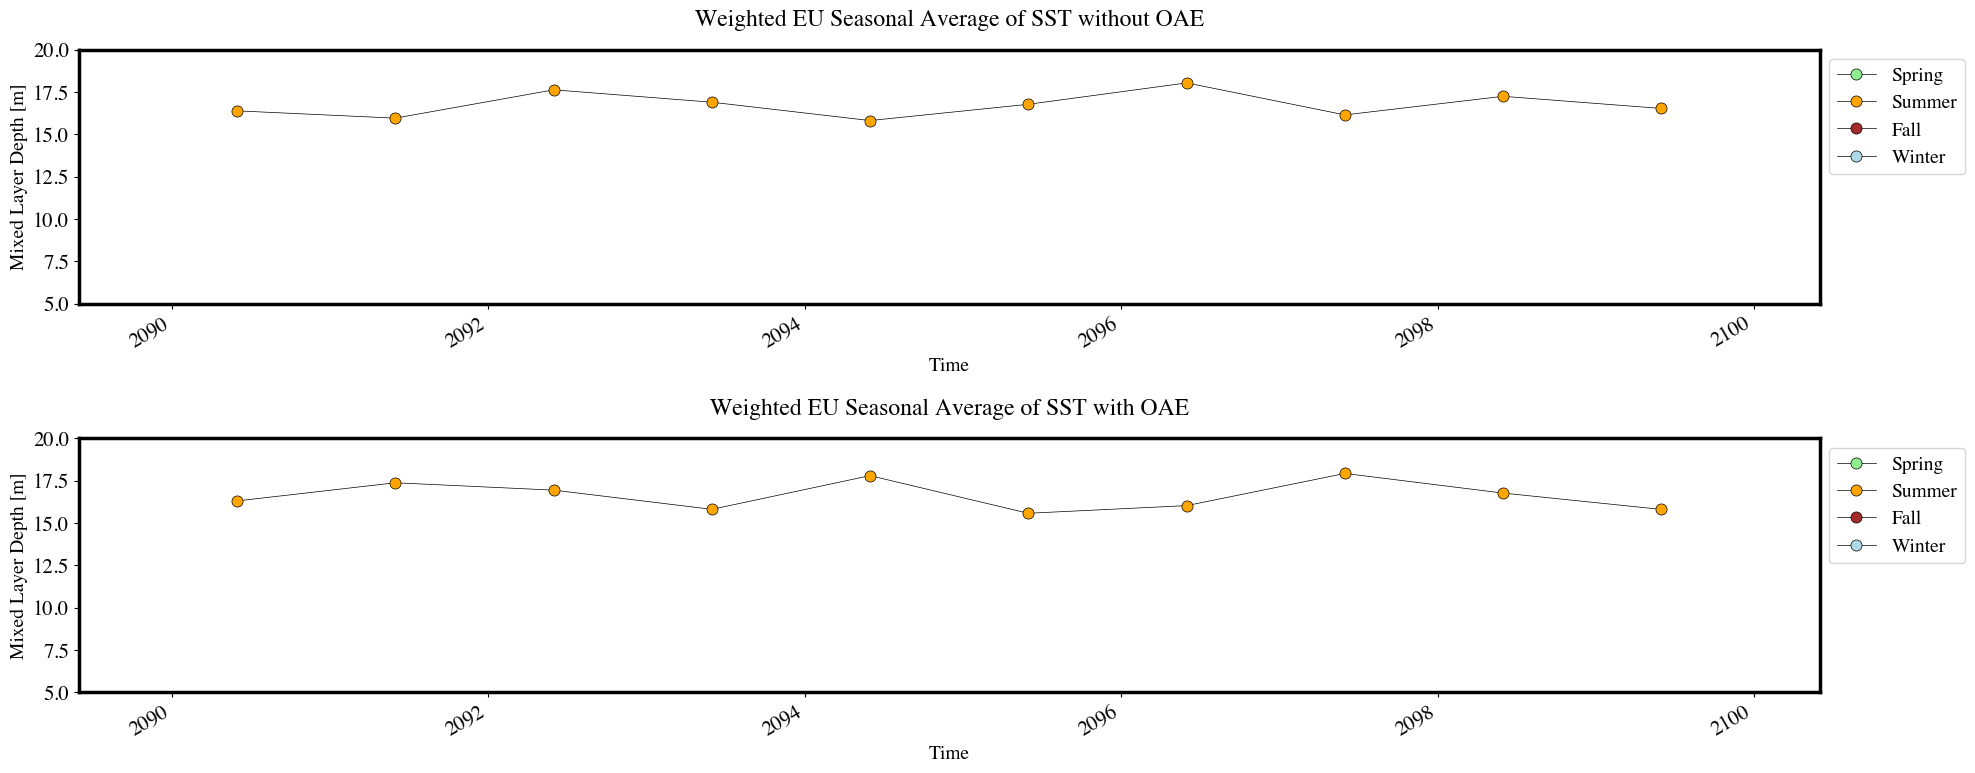

In [91]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8), sharey=False)
for month, arr in mld_weighted_season_baseline.groupby('time_counter.month'):
    arr.plot(ax=ax1,
             color="black", linewidth=0.5, 
             marker="o", markersize=8, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax1.set_ylim(5,20)
ax1.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax1.set_title("Weighted EU Seasonal Average of SST without OAE", fontsize=17, y=1.06)
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Mixed Layer Depth [m]', fontsize=14)

for month, arr in mld_weighted_season_oae.groupby('time_counter.month'):
    arr.plot(ax=ax2,
             color="black", linewidth=0.5, 
             marker="o", markersize=8, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax2.set_ylim(5,20) 
ax2.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax2.set_title("Weighted EU Seasonal Average of SST with OAE", fontsize=17, y=1.06)
ax2.set_xlabel('Time', fontsize=14)
ax2.set_ylabel('Mixed Layer Depth [m]', fontsize=14)
f.tight_layout()
plt.show()

In [62]:
# define handlers for future legends

In [63]:
class HandlerEllipse(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        center = 0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent
        p = mpatches.Ellipse(xy=center, width=height + xdescent,
                             height=height + ydescent)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]

### Weighted EU Seasonal Average of SST without OAE (seasons displayed)

In [92]:
mld_weighted_baseline = mld_weighted_season_baseline.to_dataframe('mld')
mld_weighted_baseline['Month'] = pd.DatetimeIndex(mld_weighted_baseline.index).month

In [93]:
# condition

conditions_season = [
    (mld_weighted_baseline['Month'] == 3),
    (mld_weighted_baseline['Month'] == 6),
    (mld_weighted_baseline['Month'] == 9),
    (mld_weighted_baseline['Month'] == 12)
]

values_season = ['Spring', 'Summer', 'Fall', 'Winter']

In [94]:
mld_weighted_baseline['Month'] = np.select(conditions_season, values_season)

In [95]:
# condition

colors_season = dict(zip(mld_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

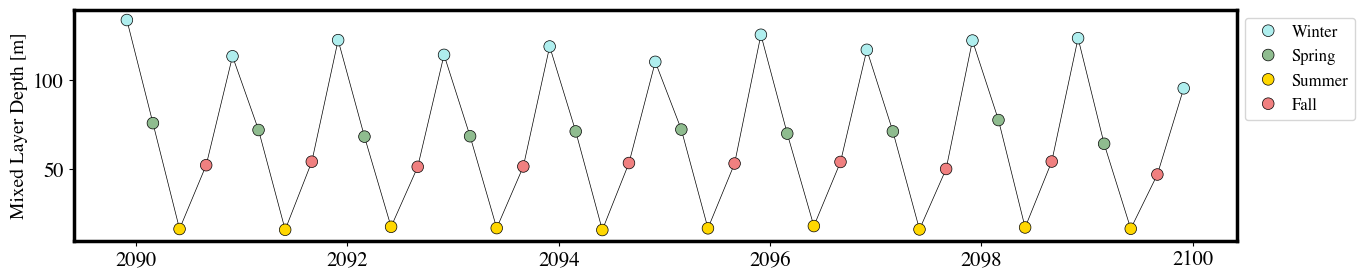

In [96]:
fig, ax = plt.subplots(figsize=(15, 3))
ax.plot_date(mld_weighted_baseline.index, mld_weighted_baseline.mld, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(mld_weighted_baseline.index, mld_weighted_baseline.mld, color=mld_weighted_baseline.Month.map(lambda x: colors_season[x]), edgecolors='black', linewidth=0.5, s=70)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_season.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=12, ncol = 1, handler_map={mpatches.Circle: HandlerEllipse()})

ax.set_ylabel('Mixed Layer Depth [m]', fontsize=14)
#ax.set_title("Weighted EU Seasonal Average of SST without OAE", fontsize=17, y=1.06)

plt.savefig('/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP1_2.6/EUmld_change_monthly_mean.png')

pass

### Weighted EU Seasonal Average of SST with OAE (seasons displayed)

In [97]:
mld_weighted_oae = mld_weighted_season_oae.to_dataframe('mld')
mld_weighted_oae['Month'] = pd.DatetimeIndex(mld_weighted_oae.index).month

In [98]:
mld_weighted_oae['Month'] = np.select(conditions_season, values_season)

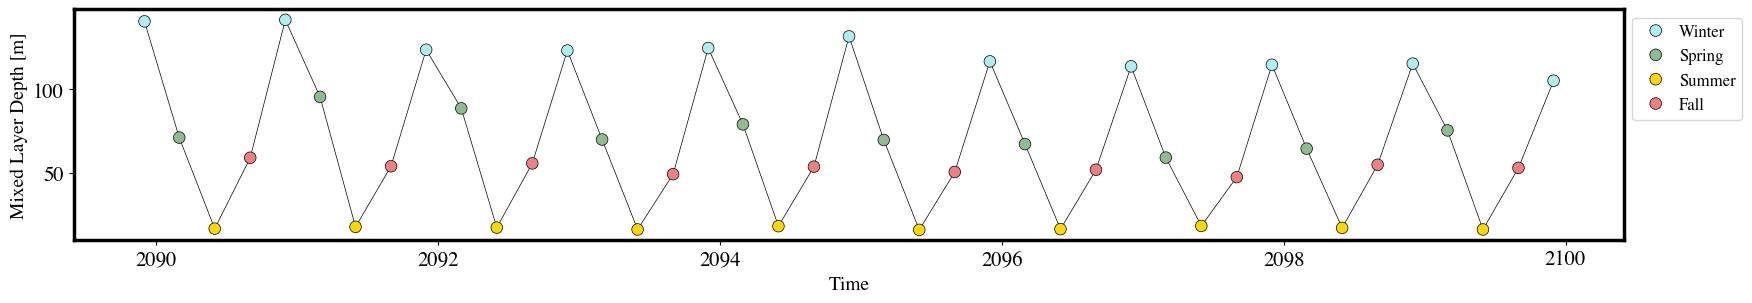

In [99]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(mld_weighted_oae.index, mld_weighted_oae.mld, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(mld_weighted_oae.index, mld_weighted_oae.mld, color=mld_weighted_oae.Month.map(lambda x: colors_season[x]), edgecolors='black', linewidth=0.5, s=70)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_season.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=12, ncol = 1, handler_map={mpatches.Circle: HandlerEllipse()})

ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Mixed Layer Depth [m]', fontsize=14)
#ax.set_title("Weighted EU Seasonal Average of SST with OAE", fontsize=17, y=1.06)

pass

### Weighted EU Seasonal Average of SST (seasons displayed)

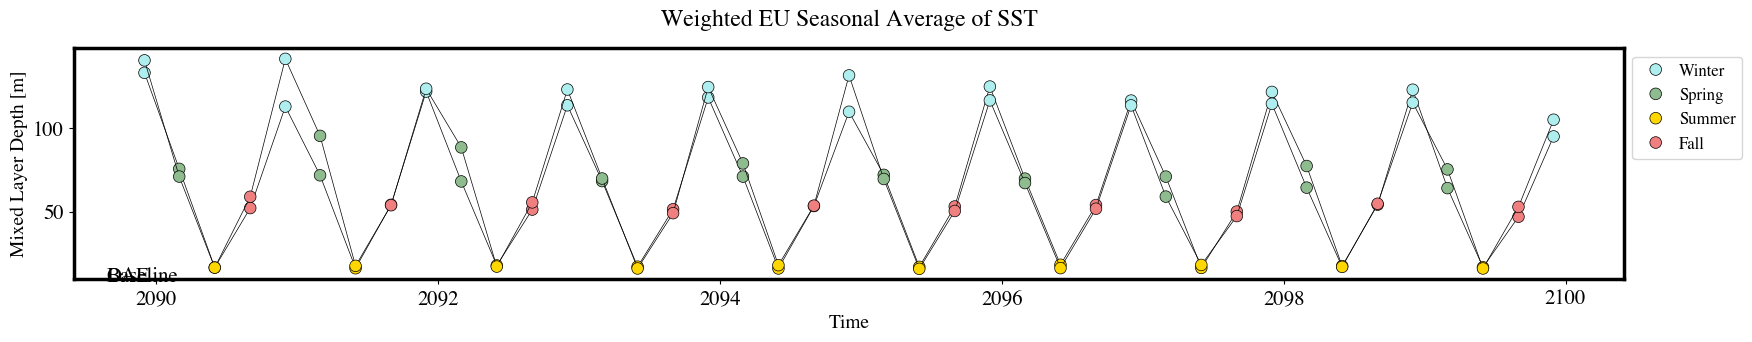

In [100]:
fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(mld_weighted_baseline.index, mld_weighted_baseline.mld, '-', color="black", linewidth=0.5, zorder=1)
ax.text(43700, 8.02, s='Baseline')
ax.scatter(mld_weighted_baseline.index, mld_weighted_baseline.mld, color=mld_weighted_baseline.Month.map(lambda x: colors_season[x]), marker='o', edgecolors='black', linewidth=0.5, s=70)

ax.plot_date(mld_weighted_oae.index, mld_weighted_oae.mld, '-', color="black", linewidth=0.5, zorder=1)
ax.text(43700, 8.08, s='OAE')
ax.scatter(mld_weighted_oae.index, mld_weighted_oae.mld, color=mld_weighted_oae.Month.map(lambda x: colors_season[x]), marker='o', edgecolors='black', linewidth=0.5, s=70)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_season.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=12, ncol = 1, handler_map={mpatches.Circle: HandlerEllipse()})

ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Mixed Layer Depth [m]', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of SST", fontsize=17, y=1.06)

pass

### Map of EU Seasonal Average of SST without OAE

In [101]:
# month_length_baseline = sliced_frame_baseline.time_counter.dt.days_in_month 
# weights_baseline = (month_length_baseline.groupby("time_counter.season") / month_length_baseline.groupby("time_counter.season").sum())
# np.testing.assert_allclose(weights_baseline.groupby('time_counter.season').sum().values, np.ones(4))

In [93]:
# weights_baseline = weights_baseline.to_dataset()

In [94]:
# ds_weighted_baseline = (sliced_frame_baseline.mld * weights_baseline.days_in_month).groupby("time_counter.season").sum(dim="time_counter")
# ds_weighted_baseline = ds_weighted_baseline.to_dataset(name='sst')
# ds_unweighted_baseline = sliced_frame_baseline.groupby("time_counter.season").mean(dim="time_counter")
# ds_diff_baseline = ds_weighted_baseline - ds_unweighted_baseline

In [96]:
# notnull = pd.notnull(ds_unweighted_baseline["mld"][0])

# fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))
# for i, season in enumerate(("DJF", "MAM", "JJA", "SON")):
#     ds_weighted_baseline["mld"].sel(season=season).where(notnull).plot.pcolormesh(
#         ax=axes[i, 0],
#         vmin=5,
#         vmax=20,
#         cmap="RdBu_r",
#         add_colorbar=True, add_labels=False,
#         extend="both",
#     )

#     ds_unweighted_baseline["mld"].sel(season=season).where(notnull).plot.pcolormesh(
#         ax=axes[i, 1],
#         vmin=5,
#         vmax=20,
#         cmap="RdBu_r",
#         add_colorbar=True, add_labels=False,
#         extend="both",
#     )

#     ds_diff_baseline["mld"].sel(season=season).where(notnull).plot.pcolormesh(
#         ax=axes[i, 2],
#         vmin=-0.1,
#         vmax=0.1,
#         cmap="RdBu_r",
#         add_colorbar=True, add_labels=False,
#         extend="both",
#     )

#     axes[i, 0].set_ylabel(season)
#     axes[i, 1].set_ylabel("")
#     axes[i, 2].set_ylabel("")

# for ax in axes.flat:
#     ax.axes.get_xaxis().set_ticklabels([])
#     ax.axes.get_yaxis().set_ticklabels([])
#     ax.axes.axis("tight")
#     ax.set_xlabel("")

# axes[0, 0].set_title("Weighted by DPM", fontsize=15)
# axes[0, 1].set_title("Equal Weighting", fontsize=15)
# axes[0, 2].set_title("Difference", fontsize=15)

# plt.tight_layout()

# fig.suptitle("EU Seasonal Average of SST from 2090 to 2100 without OAE", fontsize=17, y=1.03)

# pass

### Map of EU Seasonal Average of SST with OAE

In [29]:
# month_length_oae = sliced_frame_oae.time_counter.dt.days_in_month 
# weights_oae = (month_length_oae.groupby("time_counter.season") / month_length_oae.groupby("time_counter.season").sum())
# np.testing.assert_allclose(weights_oae.groupby('time_counter.season').sum().values, np.ones(4))

In [30]:
# weights_oae = weights_oae.to_dataset()

In [31]:
# ds_weighted_oae = (sliced_frame_oae.mld * weights_oae.days_in_month).groupby("time_counter.season").sum(dim="time_counter")
# ds_weighted_oae = ds_weighted_oae.to_dataset(name='sst')
# ds_unweighted_oae = sliced_frame_oae.groupby("time_counter.season").mean(dim="time_counter")
# ds_diff_oae = ds_weighted_oae - ds_unweighted_oae

In [97]:
# notnull = pd.notnull(ds_unweighted_oae["mld"][0])

# fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))
# for i, season in enumerate(("DJF", "MAM", "JJA", "SON")):
#     ds_weighted_oae["mld"].sel(season=season).where(notnull).plot.pcolormesh(
#         ax=axes[i, 0],
#         vmin=5,
#         vmax=20,
#         cmap="RdBu_r",
#         add_colorbar=True, add_labels=False,
#         extend="both",
#     )

#     ds_unweighted_oae["mld"].sel(season=season).where(notnull).plot.pcolormesh(
#         ax=axes[i, 1],
#         vmin=5,
#         vmax=20,
#         cmap="RdBu_r",
#         add_colorbar=True, add_labels=False,
#         extend="both",
#     )

#     ds_diff_oae["mld"].sel(season=season).where(notnull).plot.pcolormesh(
#         ax=axes[i, 2],
#         vmin=-0.1,
#         vmax=0.1,
#         cmap="RdBu_r",
#         add_colorbar=True, add_labels=False,
#         extend="both",
#     )

#     axes[i, 0].set_ylabel(season)
#     axes[i, 1].set_ylabel("")
#     axes[i, 2].set_ylabel("")

# for ax in axes.flat:
#     ax.axes.get_xaxis().set_ticklabels([])
#     ax.axes.get_yaxis().set_ticklabels([])
#     ax.axes.axis("tight")
#     ax.set_xlabel("")

# axes[0, 0].set_title("Weighted by DPM", fontsize=15)
# axes[0, 1].set_title("Equal Weighting", fontsize=15)
# axes[0, 2].set_title("Difference", fontsize=15)

# plt.tight_layout()

# fig.suptitle("EU Seasonal Average of SST from 2090 to 2100 with OAE", fontsize=17, y=1.03)

# pass

### EU Monthly Average of SST without OAE

In [105]:
mld_monthly_mean_baseline = (data_baseline["mld"].sel(time_counter=slice(start_date, end_date)))

In [106]:
mld_monthly_mean_oae = (data_oae["mld"].sel(time_counter=slice(start_date, end_date)))

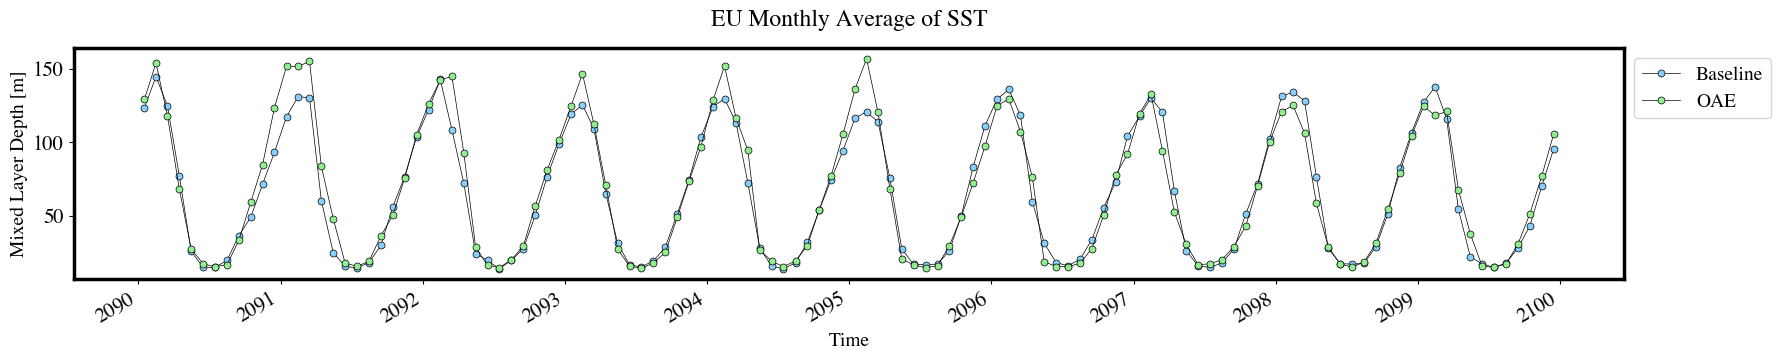

In [107]:
f, ax = plt.subplots(figsize=(20, 3))

mld_monthly_mean_baseline.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

mld_monthly_mean_oae.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("EU Monthly Average of SST", fontname="Times", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("Mixed Layer Depth [m]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### EU Monthly Average of SST without OAE (months displayed)

In [108]:
mld_baseline_monthly = mld_monthly_mean_baseline.to_dataframe('mld')
mld_baseline_monthly['Month'] = pd.DatetimeIndex(mld_baseline_monthly.index).month

In [109]:
# condition

conditions_month = [
    (mld_baseline_monthly['Month'] == 1),
    (mld_baseline_monthly['Month'] == 2),
    (mld_baseline_monthly['Month'] == 3),
    (mld_baseline_monthly['Month'] == 4),
    (mld_baseline_monthly['Month'] == 5),
    (mld_baseline_monthly['Month'] == 6),
    (mld_baseline_monthly['Month'] == 7),
    (mld_baseline_monthly['Month'] == 8),
    (mld_baseline_monthly['Month'] == 9),
    (mld_baseline_monthly['Month'] == 10),
    (mld_baseline_monthly['Month'] == 11),
    (mld_baseline_monthly['Month'] == 12)
]

values_month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

In [110]:
mld_baseline_monthly['Month'] = np.select(conditions_month, values_month)

In [111]:
# condition

colors_month = dict(zip(mld_baseline_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

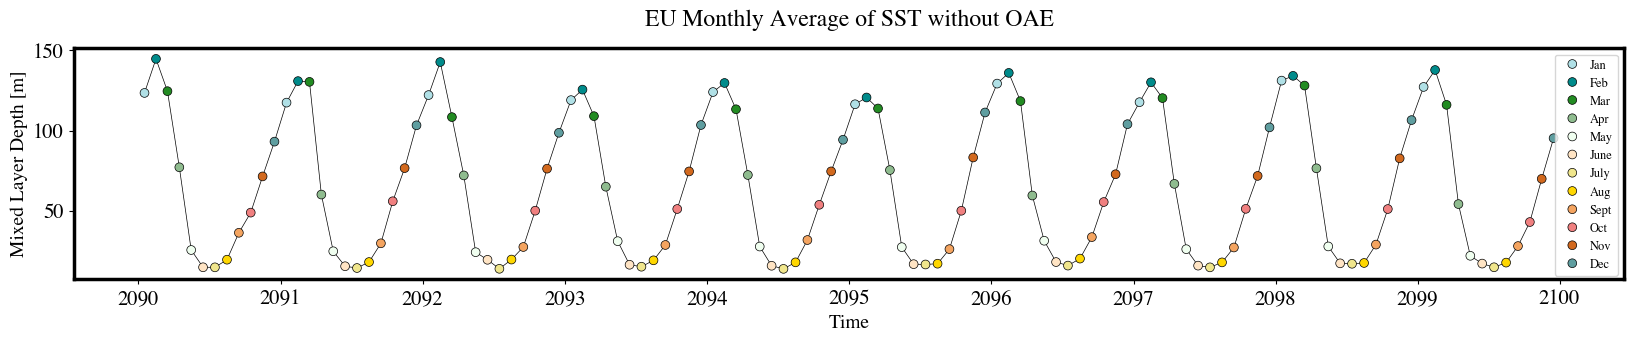

In [112]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(mld_baseline_monthly.index, mld_baseline_monthly.mld, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(mld_baseline_monthly.index, mld_baseline_monthly.mld, color=mld_baseline_monthly.Month.map(lambda x: colors_month[x]), edgecolors='black',  linewidth=0.5, s=40)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_month.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=9, ncol = 1, handler_map={mpatches.Circle: HandlerEllipse()})

ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Mixed Layer Depth [m]', fontsize=14)
ax.set_title("EU Monthly Average of SST without OAE", fontname="Times", fontsize=17, y=1.06)

pass

### EU Monthly Average of SST with OAE (months displayed)

In [113]:
mld_oae_monthly = mld_monthly_mean_oae.to_dataframe('mld')
mld_oae_monthly['Month'] = pd.DatetimeIndex(mld_oae_monthly.index).month

In [114]:
mld_oae_monthly['Month'] = np.select(conditions_month, values_month)

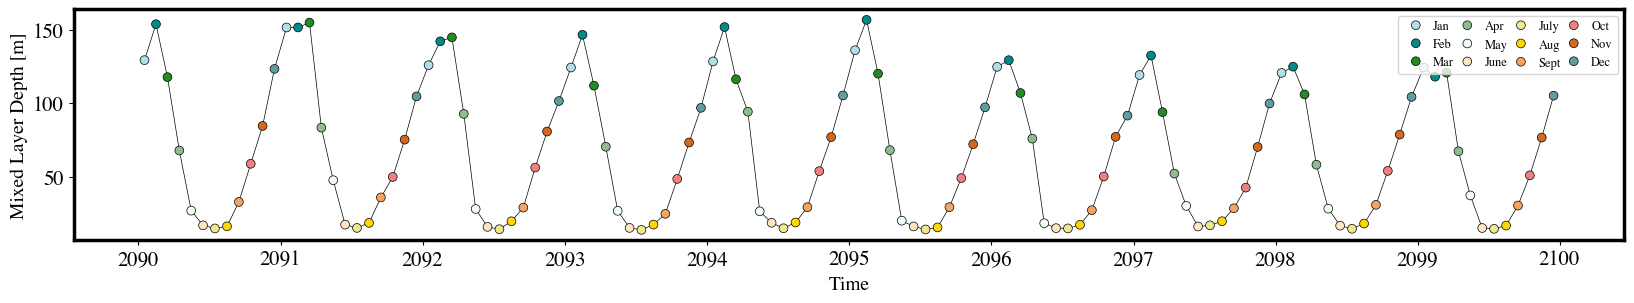

In [115]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(mld_oae_monthly.index, mld_oae_monthly.mld, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(mld_oae_monthly.index, mld_oae_monthly.mld, color=mld_oae_monthly.Month.map(lambda x: colors_month[x]), edgecolors='black',  linewidth=0.5, s=40)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_month.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper right', columnspacing=0.05, handletextpad=0.4, fontsize=9, ncol = 4, handler_map={mpatches.Circle: HandlerEllipse()})

ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Mixed Layer Depth [m]', fontsize=14)
#ax.set_title("EU Monthly Average of SST with OAE", fontname="Times", fontsize=17, y=1.06)

pass

### EU Monthly Average of SST (months displayed)

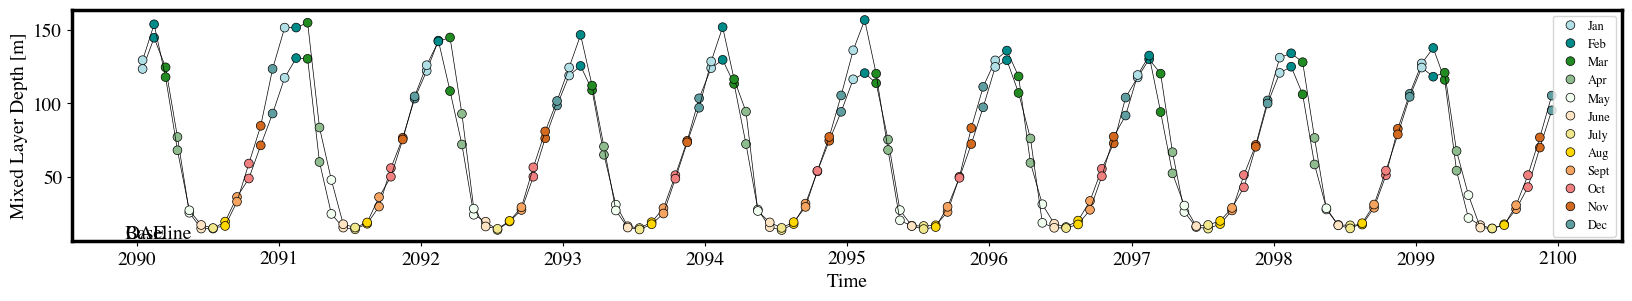

In [116]:
fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(mld_baseline_monthly.index, mld_baseline_monthly.mld, '-', color="black", linewidth=0.5, zorder=1)
ax.text(43800, 8.02, s='Baseline', fontsize=14)
ax.scatter(mld_baseline_monthly.index, mld_baseline_monthly.mld, color=mld_baseline_monthly.Month.map(lambda x: colors_month[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

ax.plot_date(mld_oae_monthly.index, mld_oae_monthly.mld, '-', color="black", linewidth=0.5, zorder=1)
ax.text(43800, 8.08, s='OAE', fontsize=14)
ax.scatter(mld_oae_monthly.index, mld_oae_monthly.mld, color=mld_oae_monthly.Month.map(lambda x: colors_month[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_month.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=9, ncol = 1, handler_map={mpatches.Circle: HandlerEllipse()})

ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Mixed Layer Depth [m]', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
#ax.set_title("EU Monthly Average of SST", fontsize=17, y=1.06)

pass

In [117]:
mean_baseline = (mld_baseline_monthly.groupby(mld_baseline_monthly.index.month).mld.mean()).reset_index()
mean_baseline['time_counter'] = mean_baseline['time_counter'].apply(lambda x: calendar.month_abbr[x])

In [118]:
mean_oae = (mld_oae_monthly.groupby(mld_oae_monthly.index.month).mld.mean()).reset_index()
mean_oae['time_counter']= mean_oae['time_counter'].apply(lambda x: calendar.month_abbr[x])

In [119]:
# condition

colors_time = dict(zip(mean_baseline.time_counter.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

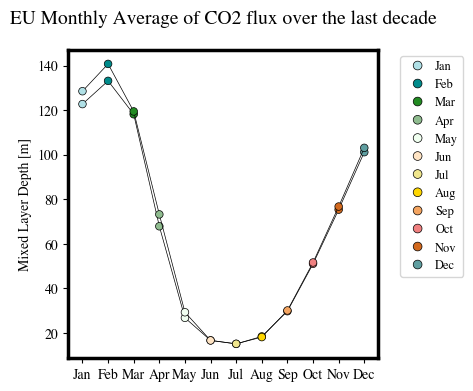

In [120]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(mean_baseline.mld, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(mean_baseline.time_counter, mean_baseline.mld, color=mean_baseline.time_counter.map(lambda x: colors_time[x]), edgecolors='black',  linewidth=0.5, s=30)

ax.plot(mean_oae.mld, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(mean_oae.time_counter, mean_oae.mld, color=mean_oae.time_counter.map(lambda x: colors_time[x]), edgecolors='black',  linewidth=0.5, s=30)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_time.items()]
ax.legend(handles = legend, bbox_to_anchor=(1.05, 1), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=9, ncol = 1, handler_map={mpatches.Circle: HandlerEllipse()})

ax.set_ylabel('Mixed Layer Depth [m]', fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.yaxis.get_offset_text().set_fontsize(10)

ax.set_title("EU Monthly Average of CO2 flux over the last decade", fontname="Times", fontsize=14, y=1.06)

pass

### Δ sst between Baseline and OAE

In [121]:
delta_sst = (mld_oae_monthly.mld - mld_baseline_monthly.mld).to_xarray()

In [122]:
delta_sst = delta_sst.to_dataframe('mld')
delta_sst['Month'] = pd.DatetimeIndex(delta_sst.index).month

In [123]:
delta_sst['Month'] = np.select(conditions_month, values_month)

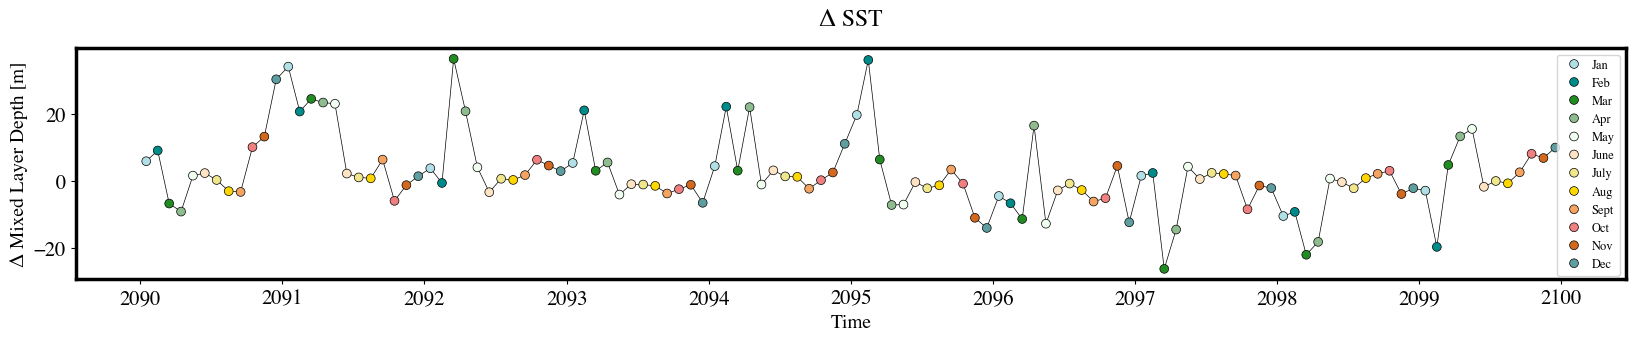

In [124]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(delta_sst.index, delta_sst.mld, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(delta_sst.index, delta_sst.mld, color=delta_sst.Month.map(lambda x: colors_month[x]), edgecolors='black',  linewidth=0.5, s=40)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_month.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=9, ncol = 1, handler_map={mpatches.Circle: HandlerEllipse()})

ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Δ Mixed Layer Depth [m]', fontsize=14)
ax.set_title("Δ SST", fontname="Times", fontsize=17, y=1.06)

pass

### Averaged monthly cycle of Δ sst

In [125]:
delta_mld_mean = (delta_sst.groupby(delta_sst.index.month).mld.mean()).reset_index()
delta_mld_mean['time_counter']= delta_mld_mean['time_counter'].apply(lambda x: calendar.month_abbr[x])

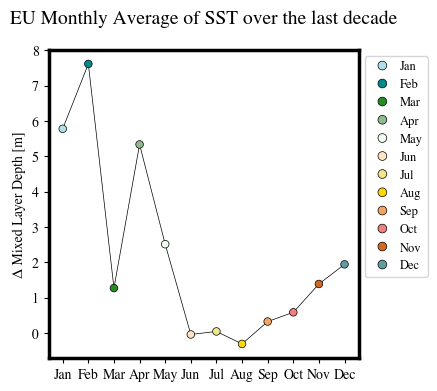

In [126]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(delta_mld_mean.mld, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(delta_mld_mean.time_counter, delta_mld_mean.mld, color=delta_mld_mean.time_counter.map(lambda x: colors_time[x]), edgecolors='black',  linewidth=0.5, s=30)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_time.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=9, ncol = 1, handler_map={mpatches.Circle: HandlerEllipse()})

ax.set_ylabel('Δ Mixed Layer Depth [m]', fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_title("EU Monthly Average of SST over the last decade", fontname="Times", fontsize=14, y=1.06)

pass

### EU Monthly Average of SST (with annual average)

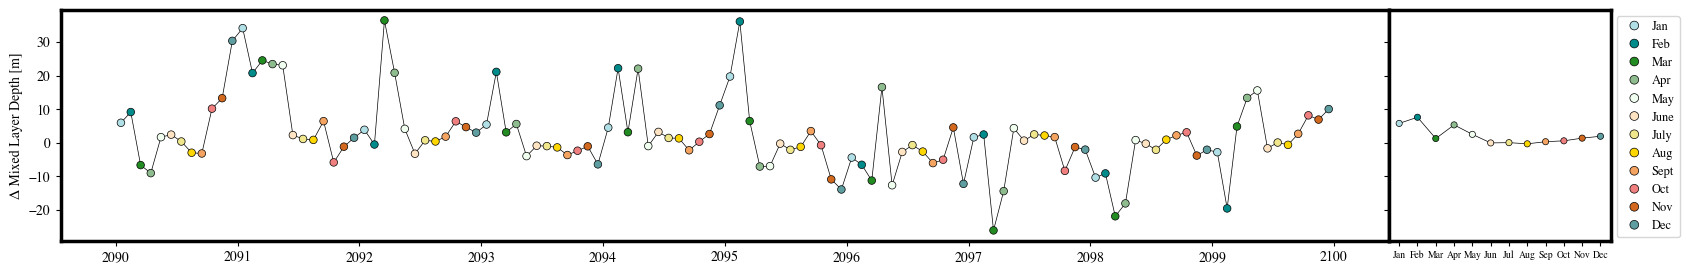

In [127]:
f, (ax, ax2) = plt.subplots(1,2, figsize=(20, 3), gridspec_kw={'width_ratios': [6, 1]}, sharey=True) 
plt.subplots_adjust(wspace=0, hspace=0)

ax.plot_date(delta_sst.index, delta_sst.mld, '-', label='Baseline', color="black", linewidth=0.5, zorder=0.8)
ax.scatter(delta_sst.index, delta_sst.mld, color=delta_sst.Month.map(lambda x: colors_month[x]), marker='o', edgecolors='black', linewidth=0.5, s=30)

ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_ylabel('Δ Mixed Layer Depth [m]', fontsize=10)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_month.items()]
ax2.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=9, ncol = 1, handler_map={mpatches.Circle: HandlerEllipse()})

ax2.plot(delta_mld_mean.mld, '-', color="black", linewidth=0.5, zorder=1)
ax2.scatter(delta_mld_mean.time_counter, delta_mld_mean.mld, color=delta_mld_mean.time_counter.map(lambda x: colors_time[x]), edgecolors='black',  linewidth=0.5, s=20)

ax2.tick_params(axis='x', which='major', labelsize=7)

pass

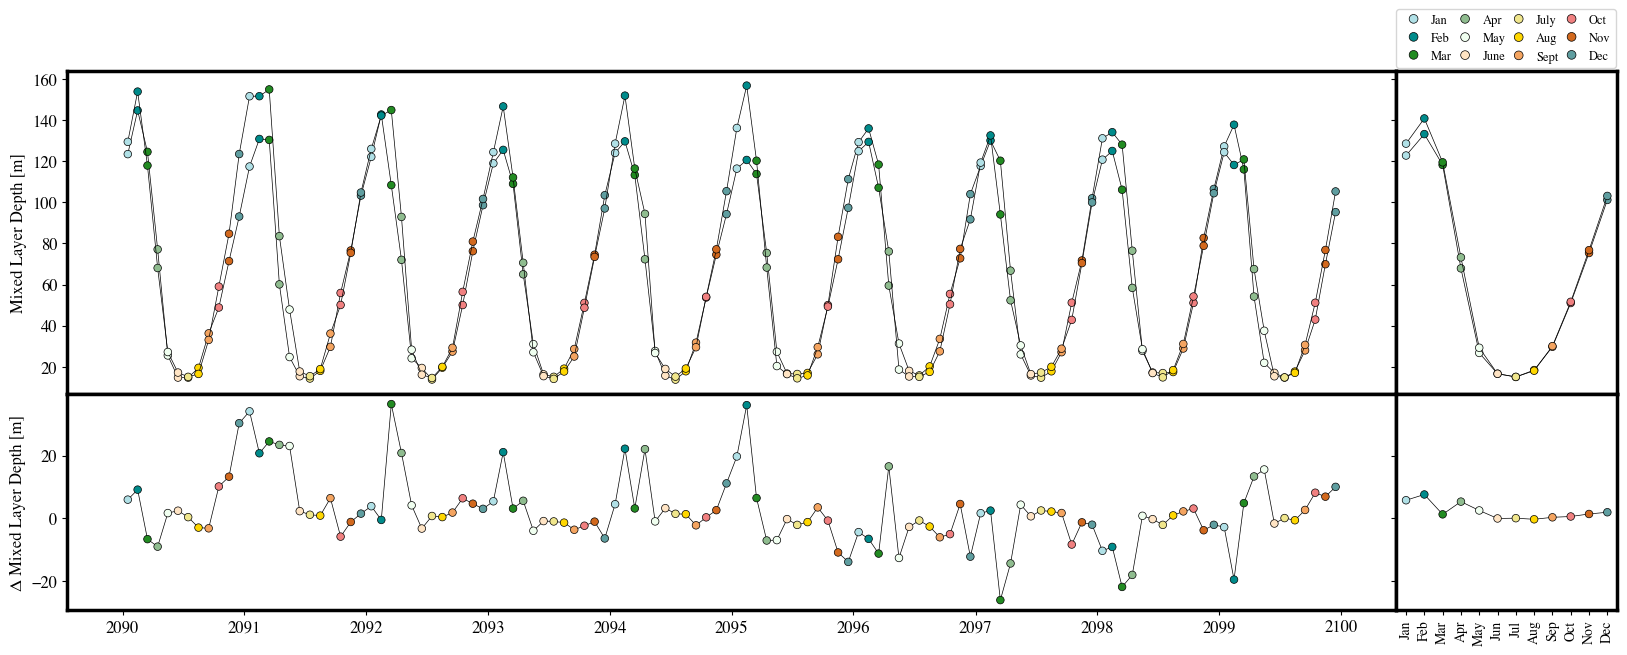

In [132]:
f, ((ax, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20, 7), gridspec_kw={'width_ratios': [6, 1], 'height_ratios': [3, 2]}, sharey='row')  
plt.subplots_adjust(wspace=0, hspace=0)

ax.plot_date(mld_baseline_monthly.index, mld_baseline_monthly.mld, '-', label='Baseline', color="black", linewidth=0.5, zorder=0.8)
#ax.text(43775, 8.02, s='Baseline', fontsize=12)
ax.scatter(mld_baseline_monthly.index, mld_baseline_monthly.mld, color=mld_baseline_monthly.Month.map(lambda x: colors_month[x]), marker='o', edgecolors='black', linewidth=0.5, s=30)

ax.plot_date(mld_oae_monthly.index, mld_oae_monthly.mld, '-', label='OAE', color="black", linewidth=0.5, zorder=1)
#ax.text(43775, 8.08, s='OAE', fontsize=12)
ax.scatter(mld_oae_monthly.index, mld_oae_monthly.mld, color=mld_oae_monthly.Month.map(lambda x: colors_month[x]), marker='o', edgecolors='black', linewidth=0.5, s=30)

ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_ylabel("Mixed Layer Depth [m]", fontsize=12)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_month.items()]
ax.legend(handles = legend, bbox_to_anchor=(1.17, 1.21), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=9, ncol = 4, handler_map={mpatches.Circle: HandlerEllipse()})

ax2.plot(mean_baseline.mld, '-', color="black", linewidth=0.5, zorder=1)
ax2.scatter(mean_baseline.time_counter, mean_baseline.mld, color=mean_baseline.time_counter.map(lambda x: colors_time[x]), edgecolors='black',  linewidth=0.5, s=30)

ax2.plot(mean_oae.mld, '-', color="black", linewidth=0.5, zorder=1)
ax2.scatter(mean_oae.time_counter, mean_oae.mld, color=mean_oae.time_counter.map(lambda x: colors_time[x]), edgecolors='black',  linewidth=0.5, s=30)

ax2.tick_params(axis='x', which='major', labelsize=8)
ax2.tick_params(axis='y', which='major', labelsize=12)

yticks = ax2.yaxis.get_major_ticks()
yticks[-2].label1.set_visible(False)

ax3.plot_date(delta_sst.index, delta_sst.mld, '-', label='Baseline', color="black", linewidth=0.5, zorder=0.8)
ax3.scatter(delta_sst.index, delta_sst.mld, color=delta_sst.Month.map(lambda x: colors_month[x]), marker='o', edgecolors='black', linewidth=0.5, s=30)

ax3.tick_params(axis='both', which='major', labelsize=12)
ax3.set_ylabel('Δ Mixed Layer Depth [m]', fontsize=12)

ax4.plot(delta_mld_mean.mld, '-', color="black", linewidth=0.5, zorder=1)
ax4.scatter(delta_mld_mean.time_counter, delta_mld_mean.mld, color=delta_mld_mean.time_counter.map(lambda x: colors_time[x]), edgecolors='black',  linewidth=0.5, s=30)

ax4.tick_params(axis='x', which='major', labelsize=10, rotation=90)
ax4.tick_params(axis='y', which='major', labelsize=12)

pass

In [129]:
summary_amplitude = pd.read_csv(r'/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP1_2.6/Summary_amplitude.csv', header=[0,1], index_col=0)

In [130]:
summary_amplitude.loc['SST', ('European Average','With OAE')] = round(mean_oae.mld.max() - mean_oae.mld.min(), 3)

In [131]:
summary_amplitude.loc['SST', ('European Average','Without OAE')] = round(mean_baseline.mld.max() - mean_baseline.mld.min(), 3)

In [72]:
summary_amplitude.to_csv('../Summary_amplitude.csv')

In [73]:
summary_maxmin = pd.read_csv(r'/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP1_2.6/Summary_minmax_eu.csv', header=[0,1], index_col=0)

In [74]:
summary_maxmin.loc['SST', ('Without OAE','Max')] = round(mean_baseline.mld.max(), 3)
summary_maxmin.loc['SST', ('Without OAE','Min')] = round(mean_baseline.mld.min(), 3)

In [75]:
summary_maxmin.loc['SST', ('With OAE','Max')] = round(mean_oae.mld.max(), 3)
summary_maxmin.loc['SST', ('With OAE','Min')] = round(mean_oae.mld.min(), 3)

In [76]:
summary_maxmin.to_csv('../Summary_minmax_eu.csv')